In [1]:
from xinet import utils
from xinet import mxnet as xinet

np = xinet.np
nn = xinet.nn

In [2]:
train_iter, test_iter = xinet.load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 1, 64, 64) float32 (32,) int32


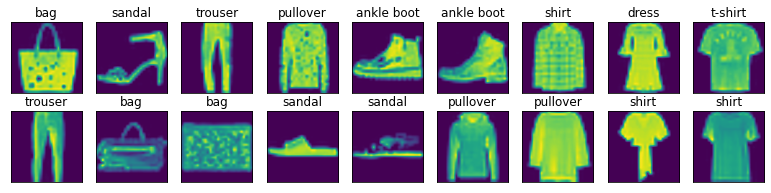

In [3]:
utils.show_images(X.squeeze(axis=1), 2, 9, titles=utils.get_fashion_mnist_labels(y));

In [4]:
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], 
                  [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

array([0.1, 0.5])

In [5]:
from mxnet import init

net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [6]:
from mxnet import gluon

loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

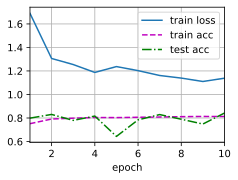

In [7]:
num_epochs = 10
xinet.train(net, train_iter, test_iter, loss, num_epochs, trainer)

FileNotFoundError: Could not find module 'C:\Users\xinzo\Anaconda3\envs\mxnet-cu102\lib\site-packages\mxnet\libmxnet.dll' (or one of its dependencies). Try using the full path with constructor syntax.